## Predicting Housing Prices - Ames Housing Dataset

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import seaborn as sns

#load Data
df = pd.read_csv('/Users/donovancotter/Desktop/ML_Detroit/Housing_Prediction_Demo/housing.csv')

## Clean Data

In [16]:
#Removing unneeded columns & rows
ms_zoning = df['MS Zoning']
sale_price = df['SalePrice']
conditions = (ms_zoning != 'RH') & (ms_zoning != 'RL') & (ms_zoning != 'RM') & (ms_zoning != 'RP') & (sale_price > 400000)

columns_to_remove = ['Unnamed: 0', 'Order', 'Alley', 'Misc Feature', 'Misc Val', 
                     'Garage Area', 'Garage Yr Blt', 'Lot Shape', 'Land Contour', 
                     'Land Slope', 'Roof Matl', 'Mas Vnr Type', 'Mas Vnr Area', 'BsmtFin Type 2',
                     'BsmtFin SF 1', 'Bsmt Unf SF', 'Heating', 'Electrical', 'Low Qual Fin SF',
                     'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
                     'TotRms AbvGrd', 'Functional', 'Fireplace Qu', 'Garage Finish', 
                     'Garage Qual', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
                     'Screen Porch', 'Mo Sold', 'PID']
                     
df['Bathrooms'] = df['Full Bath'] + df['Half Bath']
df['PorchSF'] = df['Enclosed Porch'] + df['Open Porch SF']

print(display(df.head()))
print("Data Shape Before : " + str(df.shape))

df.drop(df[conditions].index)
df.drop(columns_to_remove, axis=1, inplace=True)

#turn all string values to numerical
def categorical_features(df):
    features = list(df.select_dtypes(include=['object']).columns)
      
    for feature in features:
        unique_categories = list(df[feature].unique())
        map_dict = {}   
        for idx, category in enumerate(unique_categories):
            map_dict[category] = idx + 1
        df[feature] = df[feature].map(map_dict)
      
    return df

#normalize the data
#Columns to ignore when normalizing features
def normalize(df):
    to_ignore = ['SalePrice']
    for column in df.columns:
        x = df[column].dropna().value_counts().index[0]
        df = df.fillna(x)
        if df[column].dtype != 'object' and column not in to_ignore:
            m = df[column].min()
            M = df[column].max()
            Range = M - m
            df[column] = (df[column] - m) / Range
    return df

df = normalize(df)
df = categorical_features(df)
df = df.dropna()

Y= df["SalePrice"]
X = df.drop('SalePrice', axis=1)
print("Data Shape After : " + str(df.shape))
print(display(X.head()))

#create test & training for X, y
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)


,Unnamed: 0,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Bathrooms,PorchSF
0,0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,...,NaN,NaN,0,5,2010,WD,Normal,215000,1,62
1,1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,...,MnPrv,NaN,0,6,2010,WD,Normal,105000,1,0
2,2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,...,NaN,Gar2,12500,6,2010,WD,Normal,172000,2,36
3,3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,...,NaN,NaN,0,4,2010,WD,Normal,244000,3,0
4,4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,...,MnPrv,NaN,0,3,2010,WD,Normal,189900,3,34


None
Data Shape Before : (2930, 85)
Data Shape After : (2930, 49)


,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Utilities,Lot Config,Neighborhood,Condition 1,Condition 2,...,Garage Cond,Paved Drive,Pool Area,Pool QC,Fence,Yr Sold,Sale Type,Sale Condition,Bathrooms,PorchSF
0,0.000000,1,0.412969,0.142420,1,1,1,1,1,1,...,1,1,0.0,1,1,1.0,1,1,0.166667,0.051367
1,0.000000,2,0.204778,0.048246,1,1,2,1,2,1,...,1,2,0.0,1,2,1.0,1,1,0.166667,0.000000
2,0.000000,1,0.208191,0.060609,1,1,1,1,1,1,...,1,2,0.0,1,1,1.0,1,1,0.333333,0.029826
3,0.000000,1,0.249147,0.046087,1,1,1,1,1,1,...,1,2,0.0,1,1,1.0,1,1,0.500000,0.000000
4,0.235294,1,0.184300,0.058566,1,1,2,2,1,1,...,1,2,0.0,1,2,1.0,1,1,0.500000,0.028169


None


## Linear Regression

Train Score: 0.85
Test Score: 0.78



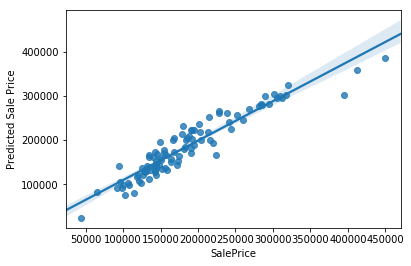

In [24]:
#train and predict
lr = LinearRegression()
lr.fit(X_train, y_train)
y_prediction = lr.predict(X_test)

#score
train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)
print("Train Score: {:.2f}".format(train_score))
print("Test Score: {:.2f}\n".format(test_score))

#plot
y_test_sample = y_test[:100]
y_prediction_sample = y_prediction[:100]
# print("test_sample:\n{}.".format(y_test_sample.values))
# print("y_pred_sample:\n{}.".format(y_prediction_sample))

ax = sns.regplot(y_test_sample, y_prediction_sample)
plt.ylabel("Predicted Sale Price")
plt.show()


## Ridge Regression

Score alpha = 0.01
Train: 0.84977332645
Test :0.78121907156


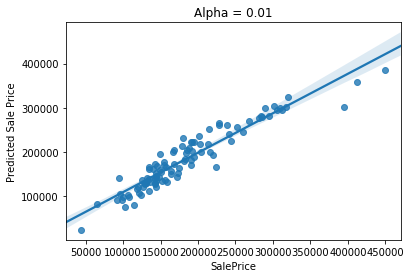

Score alpha = 0.5
Train: 0.848954066015
Test :0.786637240774


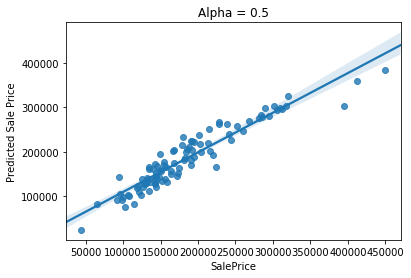

Score alpha = 5
Train: 0.834542695774
Test :0.780500721427


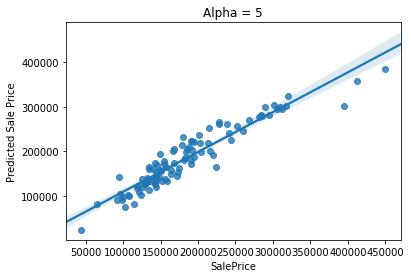

In [26]:
alpha_values = [0.01, 0.5, 5]

for alpha in alpha_values:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    print('Score alpha = ' + str(alpha) + '\nTrain: ' + str(ridge.score(X_train, y_train)) +
          '\n' + 'Test :' + str(ridge.score(X_test, y_test)))
    ax = sns.regplot(y_test_sample, y_prediction_sample)
    ax.set_title('Alpha = ' + str(alpha))
    plt.ylabel("Predicted Sale Price")
    plt.show()
